# Preprocesamiento exclusivo de regresion logistica para el datatset Base.csv

En este cuaderno realizaremos el preprocesamiento y limpieza del dataset base.csv, Vamos a realizar la limpieza de valores centinelas (puesto no hay nulos), manejar los outliers, ya que el modelo de regresion logistica es sensible a outliers, Manejar el desbalance de clases, ingenieria y seleccion de caracteristicas.  

Objetivo al cual llegar:  
- ✅ Datos Limpios y Coherentes: Sin valores imposibles como -1. Los datos faltantes han sido tratados (imputados) de forma inteligente.
- ✅ Características Informativas: Has seleccionado las variables que muestran una clara diferencia entre los casos de fraude y los no fraudulentos.
- ✅ Baja Multicolinealidad: Las variables predictoras no están fuertemente correlacionadas entre sí. Has eliminado o combinado las variables redundantes.
- ✅ Escalado de Variables Numéricas: Todas las variables numéricas han sido escaladas (por ejemplo, usando StandardScaler de Scikit-learn) para que tengan una media de 0 y una desviación estándar de 1. Esto ayuda a que el modelo converja más rápido y a que los coeficientes sean comparables.
- ✅ Variables Categóricas Codificadas: Las variables de texto (como payment_type o employment_status que vi en tu CSV) han sido convertidas a números usando técnicas como One-Hot Encoding.
- ✅ Clases Balanceadas (o Desbalance Manejado): Has aplicado una técnica como SMOTE o class_weight='balanced' para que el modelo no ignore la clase minoritaria (fraude).

In [49]:
# Preprocesamiento exclusivo de regresion logistica para el datatset Base.csv
#!/usr/bin/env python3
# coding: utf-8
# In[1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

In [50]:
# Cargar el dataset
df = pd.read_csv('archive/Base.csv')
# In[2]: Exploración inicial
print(df.info())
print(df.describe())
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 32 columns):
 #   Column                            Non-Null Count    Dtype  
---  ------                            --------------    -----  
 0   fraud_bool                        1000000 non-null  int64  
 1   income                            1000000 non-null  float64
 2   name_email_similarity             1000000 non-null  float64
 3   prev_address_months_count         1000000 non-null  int64  
 4   current_address_months_count      1000000 non-null  int64  
 5   customer_age                      1000000 non-null  int64  
 6   days_since_request                1000000 non-null  float64
 7   intended_balcon_amount            1000000 non-null  float64
 8   payment_type                      1000000 non-null  object 
 9   zip_count_4w                      1000000 non-null  int64  
 10  velocity_6h                       1000000 non-null  float64
 11  velocity_24h                      1000

In [51]:
# Regresa las veces que aparece exactamente -1 en cada columna
df.apply(lambda x: (x == -1).sum())

fraud_bool                               0
income                                   0
name_email_similarity                    0
prev_address_months_count           712920
current_address_months_count          4254
customer_age                             0
days_since_request                       0
intended_balcon_amount                   0
payment_type                             0
zip_count_4w                             0
velocity_6h                              0
velocity_24h                             0
velocity_4w                              0
bank_branch_count_8w                     0
date_of_birth_distinct_emails_4w         0
employment_status                        0
credit_risk_score                      488
email_is_free                            0
housing_status                           0
phone_home_valid                         0
phone_mobile_valid                       0
bank_months_count                   253635
has_other_cards                          0
proposed_cr

In [52]:
cols_with_neg1 = [
    'prev_address_months_count',
    'current_address_months_count',
    'credit_risk_score',
    'bank_months_count',
    'session_length_in_minutes',
    'device_distinct_emails_8w'
]

for col in cols_with_neg1:
    print(f"\nColumna: {col}")
    print("Ejemplo normal (toda la fila):")
    display(df[df[col] != -1].head(1))
    print("Ejemplo con -1 (toda la fila):")
    display(df[df[col] == -1].head(1))


Columna: prev_address_months_count
Ejemplo normal (toda la fila):


,fraud_bool,income,name_email_similarity,prev_address_months_count,current_address_months_count,customer_age,days_since_request,intended_balcon_amount,payment_type,zip_count_4w,...,has_other_cards,proposed_credit_limit,foreign_request,source,session_length_in_minutes,device_os,keep_alive_session,device_distinct_emails_8w,device_fraud_count,month
2,0,0.8,0.996707,9,14,40,0.012316,-1.490386,AB,1095,...,0,200.0,0,INTERNET,22.730559,windows,0,1,0,0


Ejemplo con -1 (toda la fila):


,fraud_bool,income,name_email_similarity,prev_address_months_count,current_address_months_count,customer_age,days_since_request,intended_balcon_amount,payment_type,zip_count_4w,...,has_other_cards,proposed_credit_limit,foreign_request,source,session_length_in_minutes,device_os,keep_alive_session,device_distinct_emails_8w,device_fraud_count,month
0,0,0.3,0.986506,-1,25,40,0.006735,102.453711,AA,1059,...,0,1500.0,0,INTERNET,16.224843,linux,1,1,0,0



Columna: current_address_months_count
Ejemplo normal (toda la fila):


,fraud_bool,income,name_email_similarity,prev_address_months_count,current_address_months_count,customer_age,days_since_request,intended_balcon_amount,payment_type,zip_count_4w,...,has_other_cards,proposed_credit_limit,foreign_request,source,session_length_in_minutes,device_os,keep_alive_session,device_distinct_emails_8w,device_fraud_count,month
0,0,0.3,0.986506,-1,25,40,0.006735,102.453711,AA,1059,...,0,1500.0,0,INTERNET,16.224843,linux,1,1,0,0


Ejemplo con -1 (toda la fila):


,fraud_bool,income,name_email_similarity,prev_address_months_count,current_address_months_count,customer_age,days_since_request,intended_balcon_amount,payment_type,zip_count_4w,...,has_other_cards,proposed_credit_limit,foreign_request,source,session_length_in_minutes,device_os,keep_alive_session,device_distinct_emails_8w,device_fraud_count,month
160,0,0.8,0.057021,325,-1,10,0.002351,-0.74942,AD,986,...,0,1500.0,0,INTERNET,34.299644,macintosh,0,1,0,0



Columna: credit_risk_score
Ejemplo normal (toda la fila):


,fraud_bool,income,name_email_similarity,prev_address_months_count,current_address_months_count,customer_age,days_since_request,intended_balcon_amount,payment_type,zip_count_4w,...,has_other_cards,proposed_credit_limit,foreign_request,source,session_length_in_minutes,device_os,keep_alive_session,device_distinct_emails_8w,device_fraud_count,month
0,0,0.3,0.986506,-1,25,40,0.006735,102.453711,AA,1059,...,0,1500.0,0,INTERNET,16.224843,linux,1,1,0,0


Ejemplo con -1 (toda la fila):


,fraud_bool,income,name_email_similarity,prev_address_months_count,current_address_months_count,customer_age,days_since_request,intended_balcon_amount,payment_type,zip_count_4w,...,has_other_cards,proposed_credit_limit,foreign_request,source,session_length_in_minutes,device_os,keep_alive_session,device_distinct_emails_8w,device_fraud_count,month
7515,0,0.9,0.69075,-1,37,20,0.003772,-0.633717,AA,4706,...,0,200.0,0,INTERNET,3.303774,linux,1,1,0,0



Columna: bank_months_count
Ejemplo normal (toda la fila):


,fraud_bool,income,name_email_similarity,prev_address_months_count,current_address_months_count,customer_age,days_since_request,intended_balcon_amount,payment_type,zip_count_4w,...,has_other_cards,proposed_credit_limit,foreign_request,source,session_length_in_minutes,device_os,keep_alive_session,device_distinct_emails_8w,device_fraud_count,month
0,0,0.3,0.986506,-1,25,40,0.006735,102.453711,AA,1059,...,0,1500.0,0,INTERNET,16.224843,linux,1,1,0,0


Ejemplo con -1 (toda la fila):


,fraud_bool,income,name_email_similarity,prev_address_months_count,current_address_months_count,customer_age,days_since_request,intended_balcon_amount,payment_type,zip_count_4w,...,has_other_cards,proposed_credit_limit,foreign_request,source,session_length_in_minutes,device_os,keep_alive_session,device_distinct_emails_8w,device_fraud_count,month
17,0,0.6,0.482906,-1,38,40,0.037925,-0.994614,AC,2774,...,0,200.0,0,INTERNET,4.486326,other,1,1,0,0



Columna: session_length_in_minutes
Ejemplo normal (toda la fila):


,fraud_bool,income,name_email_similarity,prev_address_months_count,current_address_months_count,customer_age,days_since_request,intended_balcon_amount,payment_type,zip_count_4w,...,has_other_cards,proposed_credit_limit,foreign_request,source,session_length_in_minutes,device_os,keep_alive_session,device_distinct_emails_8w,device_fraud_count,month
0,0,0.3,0.986506,-1,25,40,0.006735,102.453711,AA,1059,...,0,1500.0,0,INTERNET,16.224843,linux,1,1,0,0


Ejemplo con -1 (toda la fila):


,fraud_bool,income,name_email_similarity,prev_address_months_count,current_address_months_count,customer_age,days_since_request,intended_balcon_amount,payment_type,zip_count_4w,...,has_other_cards,proposed_credit_limit,foreign_request,source,session_length_in_minutes,device_os,keep_alive_session,device_distinct_emails_8w,device_fraud_count,month
1187,0,0.6,0.441644,-1,61,50,0.004687,-0.747962,AC,3471,...,0,200.0,0,TELEAPP,-1.0,other,0,0,0,0



Columna: device_distinct_emails_8w
Ejemplo normal (toda la fila):


,fraud_bool,income,name_email_similarity,prev_address_months_count,current_address_months_count,customer_age,days_since_request,intended_balcon_amount,payment_type,zip_count_4w,...,has_other_cards,proposed_credit_limit,foreign_request,source,session_length_in_minutes,device_os,keep_alive_session,device_distinct_emails_8w,device_fraud_count,month
0,0,0.3,0.986506,-1,25,40,0.006735,102.453711,AA,1059,...,0,1500.0,0,INTERNET,16.224843,linux,1,1,0,0


Ejemplo con -1 (toda la fila):


,fraud_bool,income,name_email_similarity,prev_address_months_count,current_address_months_count,customer_age,days_since_request,intended_balcon_amount,payment_type,zip_count_4w,...,has_other_cards,proposed_credit_limit,foreign_request,source,session_length_in_minutes,device_os,keep_alive_session,device_distinct_emails_8w,device_fraud_count,month
380,0,0.9,0.011502,-1,38,40,0.003979,-0.235103,AB,3485,...,0,200.0,0,INTERNET,2.60408,windows,0,-1,0,0


## Limpieza de datos
El dataset usa -1 para representar situaciones específicas, no como un valor numérico real. Tratarlo como un número confundiría al modelo. Vamos a darle un tratamiento inteligente a cada caso.

Para prev_address_months_count y bank_months_count:

Lógica: Un valor de -1 aquí muy probablemente significa "no aplica" o "no tiene" (sin dirección previa, sin historial bancario). Esto en sí mismo es información útil.

Estrategia:

Crearemos una nueva columna binaria (flag) que capture esta información. Por ejemplo, prev_address_unknown será 1 si el valor original era -1, y 0 en otro caso.

Luego, reemplazaremos el -1 en la columna original por 0, ya que lógicamente representa "cero meses de historial".

In [53]:
# Limpieza automática de valores centinela -1 para regresión logística

# 1. prev_address_months_count: crear flag y reemplazar -1 por 0
df['prev_address_unknown'] = df['prev_address_months_count'].apply(lambda x: 1 if x == -1 else 0)
df['prev_address_months_count'] = df['prev_address_months_count'].replace(-1, 0)

# 2. bank_months_count: crear flag y reemplazar -1 por 0
df['bank_months_unknown'] = df['bank_months_count'].apply(lambda x: 1 if x == -1 else 0)
df['bank_months_count'] = df['bank_months_count'].replace(-1, 0)

# 3. current_address_months_count: imputar -1 con la mediana
median_current = df[df['current_address_months_count'] != -1]['current_address_months_count'].median()
df['current_address_months_count'] = df['current_address_months_count'].replace(-1, median_current)

# 4. credit_risk_score: imputar -1 con la mediana
median_credit = df[df['credit_risk_score'] != -1]['credit_risk_score'].median()
df['credit_risk_score'] = df['credit_risk_score'].replace(-1, median_credit)

# 5. session_length_in_minutes: imputar -1 con la mediana
median_session = df[df['session_length_in_minutes'] != -1]['session_length_in_minutes'].median()
df['session_length_in_minutes'] = df['session_length_in_minutes'].replace(-1, median_session)

# 6. device_distinct_emails_8w: imputar -1 con 0
df['device_distinct_emails_8w'] = df['device_distinct_emails_8w'].replace(-1, 0)

## Codificacion de variables categoricas

In [54]:
# Encontrar todas las variables categóricas en el DataFrame
categorical_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()
print("Variables categóricas:", categorical_cols)

## Codificacion de variables categoricas
# Aplicar One-Hot Encoding a las variables categóricas
ohe = OneHotEncoder(drop='first', sparse_output=False)
ohe_df = pd.DataFrame(ohe.fit_transform(df[categorical_cols]), columns=ohe.get_feature_names_out(categorical_cols))
df = pd.concat([df.drop(columns=categorical_cols), ohe_df], axis=1)
print("DataFrame después de la codificación One-Hot:")
print(df.info())

Variables categóricas: ['payment_type', 'employment_status', 'housing_status', 'source', 'device_os']
DataFrame después de la codificación One-Hot:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 50 columns):
 #   Column                            Non-Null Count    Dtype  
---  ------                            --------------    -----  
 0   fraud_bool                        1000000 non-null  int64  
 1   income                            1000000 non-null  float64
 2   name_email_similarity             1000000 non-null  float64
 3   prev_address_months_count         1000000 non-null  int64  
 4   current_address_months_count      1000000 non-null  int64  
 5   customer_age                      1000000 non-null  int64  
 6   days_since_request                1000000 non-null  float64
 7   intended_balcon_amount            1000000 non-null  float64
 8   zip_count_4w                      1000000 non-null  int64  
 9   velocity_6h         

In [55]:
# Imprime el número de columnas ANTES de eliminar
print(f"Número de columnas antes de eliminar: {df.shape[1]}")
print("Columnas a eliminar: ['velocity_6h', 'velocity_24h']")

# 1. Define las columnas que quieres eliminar
columnas_a_eliminar = ['velocity_6h', 'velocity_24h']

# 2. Elimina las columnas del DataFrame
df_final = df.drop(columns=columnas_a_eliminar)

# 3. Verifica el resultado
print(f"Número de columnas después de eliminar: {df_final.shape[1]}")
print("\n¡Las columnas han sido eliminadas exitosamente!")

Número de columnas antes de eliminar: 50
Columnas a eliminar: ['velocity_6h', 'velocity_24h']
Número de columnas después de eliminar: 48

¡Las columnas han sido eliminadas exitosamente!


In [56]:
# Guardar el DataFrame procesado como un nuevo CSV
df.to_csv('Base_procesado.csv', index=False)

## Seleccion de caracteristicas

Estrategia: Usaremos una matriz de correlación para visualizar qué tan relacionadas están las variables numéricas. Si dos variables tienen una correlación muy alta (cercana a 1 o -1), significa que contienen prácticamente la misma información. En ese caso, es buena idea eliminar una de ellas.

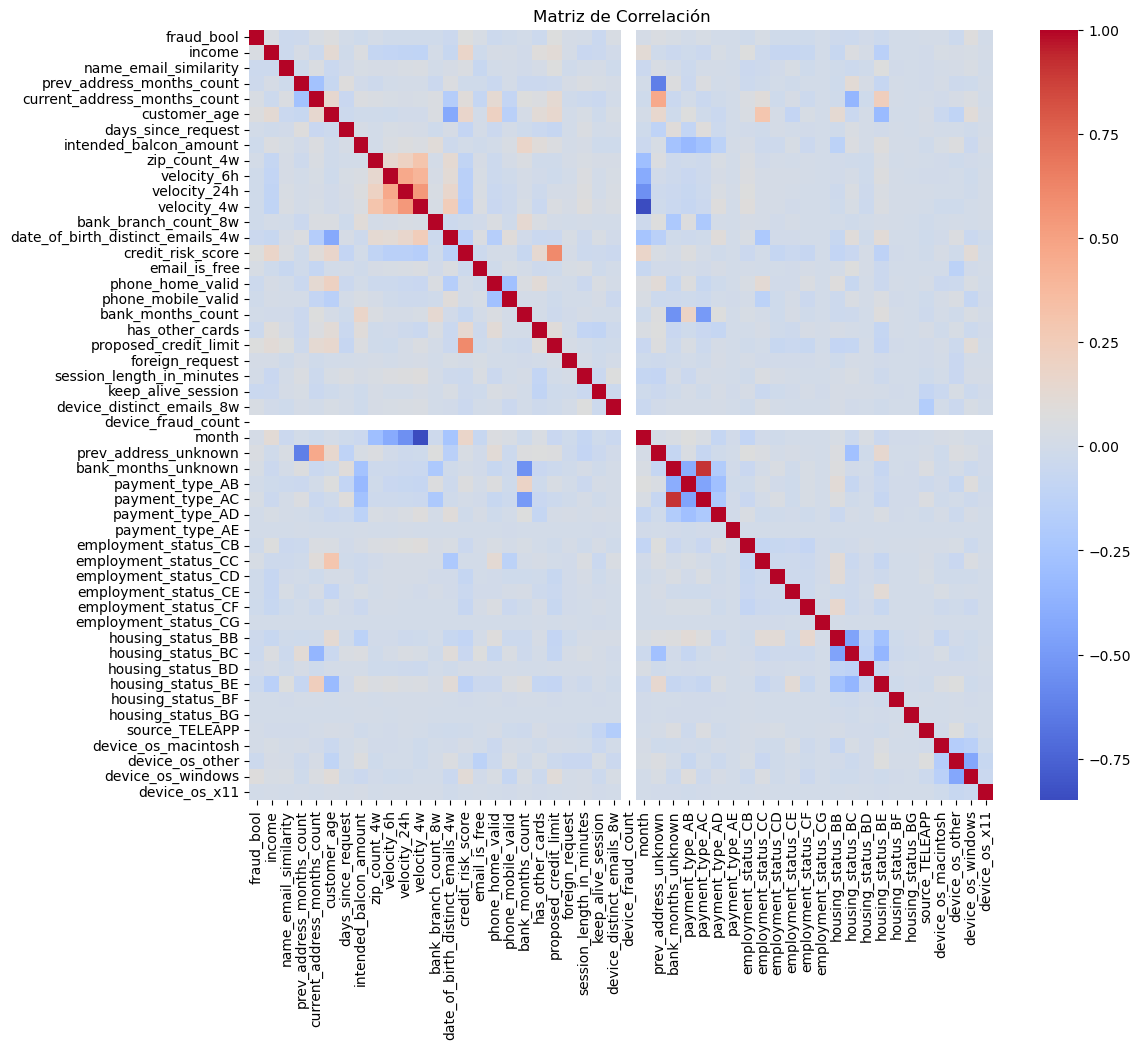

In [57]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calcula la matriz de correlación
corr_matrix = df.corr()

# Crea un mapa de calor para visualizarla
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, cmap='coolwarm')
plt.title('Matriz de Correlación')
plt.show()

# Acción: Si ves cuadrados de color rojo intenso o azul intenso (fuera de la diagonal principal),
# investiga esas dos variables y considera eliminar una.

In [58]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Asumiendo que df_processed es tu dataframe limpio
X = df.drop('fraud_bool', axis=1)
y = df['fraud_bool']

# IMPORTANTE: Divide tus datos ANTES de cualquier otro paso
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Escala los datos (después de dividir)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

# Entrena el modelo Lasso (C pequeño = regularización fuerte)
lasso_model = LogisticRegression(penalty='l1', C=0.1, solver='liblinear', class_weight='balanced')
lasso_model.fit(X_train_scaled, y_train)

# Muestra las características que NO fueron eliminadas
important_features = X.columns[lasso_model.coef_[0] != 0]
print("Características seleccionadas por Lasso:", important_features)

Características seleccionadas por Lasso: Index(['income', 'name_email_similarity', 'prev_address_months_count',
       'current_address_months_count', 'customer_age', 'days_since_request',
       'intended_balcon_amount', 'zip_count_4w', 'velocity_6h', 'velocity_24h',
       'velocity_4w', 'bank_branch_count_8w',
       'date_of_birth_distinct_emails_4w', 'credit_risk_score',
       'email_is_free', 'phone_home_valid', 'phone_mobile_valid',
       'bank_months_count', 'has_other_cards', 'proposed_credit_limit',
       'foreign_request', 'session_length_in_minutes', 'keep_alive_session',
       'device_distinct_emails_8w', 'month', 'prev_address_unknown',
       'bank_months_unknown', 'payment_type_AB', 'payment_type_AC',
       'payment_type_AD', 'payment_type_AE', 'employment_status_CB',
       'employment_status_CC', 'employment_status_CD', 'employment_status_CE',
       'employment_status_CF', 'employment_status_CG', 'housing_status_BB',
       'housing_status_BC', 'housing_status_B

### Manejo del desbalance de clases
Hemos balanceado el costo de las clases en el modelo de regresion lasso pero eso es en el caso de que nos dejen usar framework para entrenarlo.  
Asi que mejor usamos SMOTE por si acaso.

In [59]:
from imblearn.over_sampling import SMOTE

# OJO: SMOTE se aplica SOLAMENTE al conjunto de entrenamiento
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_scaled, y_train)

# Ahora, entrenarías tu modelo usando X_train_resampled y y_train_resampled
# Entrena el modelo con los datos balanceados
model = LogisticRegression(penalty='l1', C=0.1, solver='liblinear', class_weight='balanced', random_state=42)
model.fit(X_train_resampled, y_train_resampled)

# Escala X_test igual que X_train (ya lo hiciste antes)
X_test_scaled = scaler.transform(X_test)

## Evaluacion del modelo

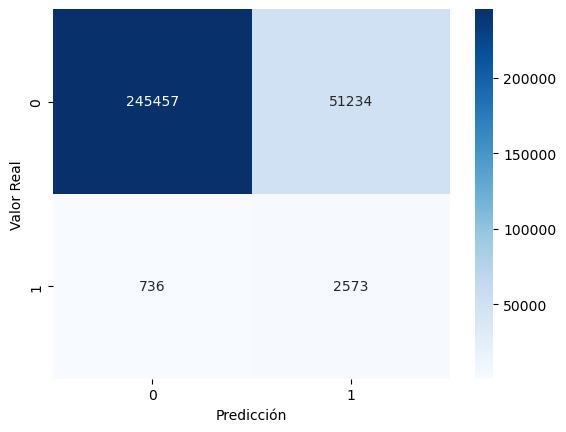

In [60]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Asumiendo que 'model' es tu regresión logística ya entrenada
# y 'X_test_scaled' y 'y_test' son tus datos de prueba
y_pred = model.predict(X_test_scaled)

# Genera la matriz
cm = confusion_matrix(y_test, y_pred)

# Visualízala
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicción')
plt.ylabel('Valor Real')
plt.show()

In [61]:
# Imprime un reporte completo
print(classification_report(y_test, y_pred, target_names=['No Fraude (0)', 'Fraude (1)']))

               precision    recall  f1-score   support

No Fraude (0)       1.00      0.83      0.90    296691
   Fraude (1)       0.05      0.78      0.09      3309

     accuracy                           0.83    300000
    macro avg       0.52      0.80      0.50    300000
 weighted avg       0.99      0.83      0.90    300000



Ahora vamos a mejorar el modelo

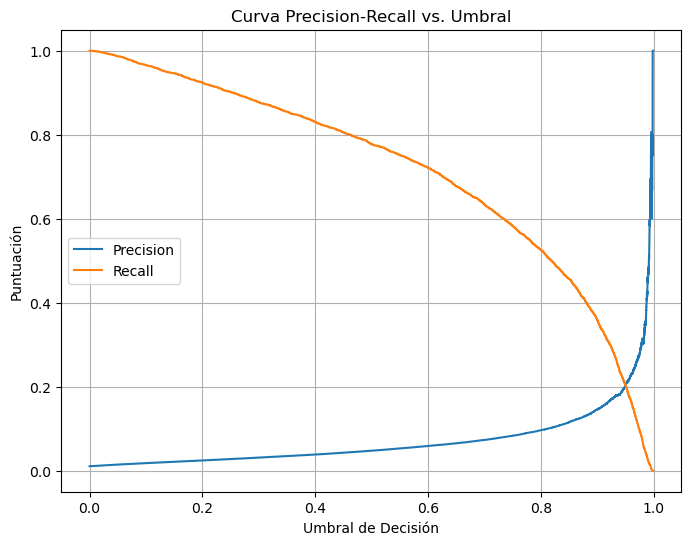

In [62]:
# Obtiene las probabilidades de predicción para el conjunto de prueba
# Usamos [:, 1] para quedarnos solo con la probabilidad de la clase positiva (Fraude)
y_probabilities = model.predict_proba(X_test_scaled)[:, 1]

from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

# Calcula los puntos de la curva
precision, recall, thresholds = precision_recall_curve(y_test, y_probabilities)

# Grafica la curva
plt.figure(figsize=(8, 6))
plt.plot(thresholds, precision[:-1], label='Precision')
plt.plot(thresholds, recall[:-1], label='Recall')
plt.xlabel('Umbral de Decisión')
plt.ylabel('Puntuación')
plt.title('Curva Precision-Recall vs. Umbral')
plt.legend()
plt.grid(True)
plt.show()

In [63]:
# Elige tu nuevo umbral
NUEVO_UMBRAL = 0.4

# Aplica el umbral a las probabilidades para obtener las nuevas predicciones
y_pred_nuevo = (y_probabilities >= NUEVO_UMBRAL).astype(int)

# ¡Evalúa de nuevo!
print("Resultados con el nuevo umbral de", NUEVO_UMBRAL)
print(classification_report(y_test, y_pred_nuevo, target_names=['No Fraude (0)', 'Fraude (1)']))

Resultados con el nuevo umbral de 0.4
               precision    recall  f1-score   support

No Fraude (0)       1.00      0.77      0.87    296691
   Fraude (1)       0.04      0.83      0.07      3309

     accuracy                           0.77    300000
    macro avg       0.52      0.80      0.47    300000
 weighted avg       0.99      0.77      0.86    300000

